# Assignment 9
Analyzing Customer Churn in a Telecommunications Company

In [1]:
! pip install pandas numpy scikit-learn seaborn

In [2]:
import pandas as pd #data manipulation
import numpy as np #numerical computations
from sklearn.model_selection import train_test_split 
from sklearn import metrics #evaluating the performance of machine learning model

In [3]:
data = pd.read_csv("telecom_customer_churn.csv")
print(data.index)

RangeIndex(start=0, stop=7043, step=1)


In [4]:
print(data.columns)

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')


In [5]:
data.shape

(7043, 38)

In [6]:
print(data.head())

  Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charg

In [7]:
data.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [8]:
data.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [9]:
print("Number of rows before removing duplicates:", len(data))

Number of rows before removing duplicates: 7043


In [10]:
# Remove duplicate records
data = data.drop_duplicates()

In [11]:
data.dropna()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
54,0094-OIFMO,Female,78,No,1,North Hollywood,91605,34.207295,-118.400022,0,...,Bank Withdrawal,95.00,1120.30,0.0,120,127.49,1367.79,Churned,Dissatisfaction,Product dissatisfaction
67,0112-QWPNC,Male,61,Yes,0,Valyermo,93563,34.395830,-117.734568,1,...,Bank Withdrawal,84.35,4059.35,0.0,0,1937.95,5997.30,Churned,Competitor,Competitor offered higher download speeds
77,0125-LZQXK,Male,42,No,0,Big Oak Flat,95305,37.818589,-120.256995,0,...,Bank Withdrawal,101.35,1553.95,0.0,0,688.80,2242.75,Churned,Attitude,Attitude of service provider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007,9940-RHLFB,Female,53,No,0,Sunset Beach,90742,33.719221,-118.073596,0,...,Bank Withdrawal,75.30,75.30,0.0,0,26.06,101.36,Churned,Competitor,Competitor made better offer
7010,9944-HKVVB,Female,55,No,0,King City,93930,36.220761,-120.980777,0,...,Bank Withdrawal,95.10,307.40,0.0,0,142.86,450.26,Churned,Competitor,Competitor had better devices
7012,9947-OTFQU,Male,65,No,0,Covina,91722,34.097345,-117.906736,0,...,Bank Withdrawal,74.40,1074.30,0.0,0,436.65,1510.95,Churned,Competitor,Competitor had better devices
7036,9985-MWVIX,Female,53,No,0,Hume,93628,36.807595,-118.901544,0,...,Credit Card,70.15,70.15,0.0,0,42.09,112.24,Churned,Competitor,Competitor had better devices


In [12]:
data.describe()


,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [13]:


data['Zip Code'].astype(str).str.zfill(5)  # Ensure all zip codes are 5 digits

# 6. Convert columns to the correct data types
data['Tenure in Months'] = np.floor(data['Tenure in Months']).astype(int)


In [14]:
data.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [15]:
unique, counts = np.unique(data['Total Charges'], return_counts=True)
print(unique, counts)

[  18.8    18.85   18.9  ... 8670.1  8672.45 8684.8 ] [1 2 1 ... 1 1 1]


In [16]:
import warnings

In [17]:
warnings.filterwarnings("ignore")

In [25]:
data['Tenure Group'] = pd.cut(data['Tenure in Months'], bins=[0, 12, 24, 36, 48, 60, data['Tenure in Months'].max()], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '60+'])
data['Tenure Years'] = data['Tenure in Months'] / 12
data['Avg Revenue per Tenure Month'] = data['Total Revenue'] / data['Tenure in Months']


In [26]:
data['Total Extra Charges'] = data['Total Extra Data Charges'] + data['Total Long Distance Charges']
data['Avg Monthly Charge'] = data['Total Charges'] / data['Tenure in Months']


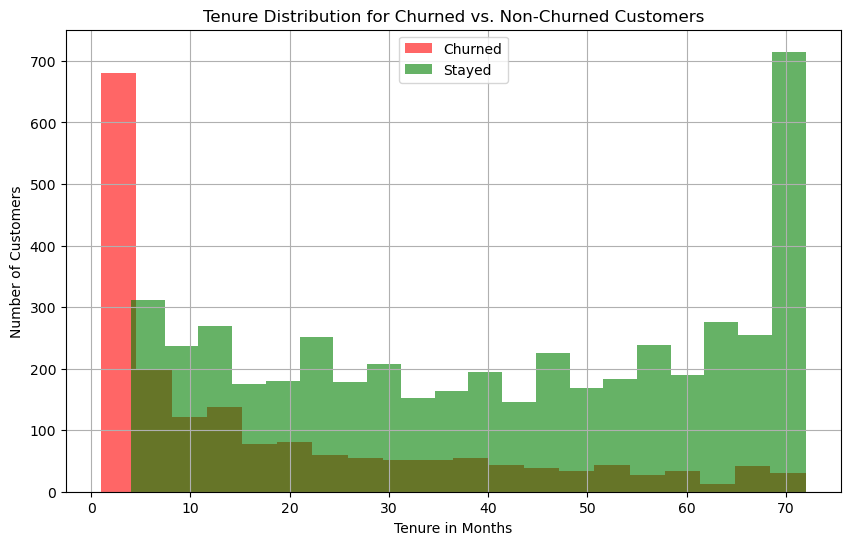

In [32]:
plt.figure(figsize=(10, 6))
data[data['Customer Status'] == 'Churned']['Tenure in Months'].hist(alpha=0.6, color='red', bins=20, label='Churned')
data[data['Customer Status'] == 'Stayed']['Tenure in Months'].hist(alpha=0.6, color='green', bins=20, label='Stayed')
plt.xlabel('Tenure in Months')
plt.ylabel('Number of Customers')
plt.title('Tenure Distribution for Churned vs. Non-Churned Customers')
plt.legend()
plt.show()


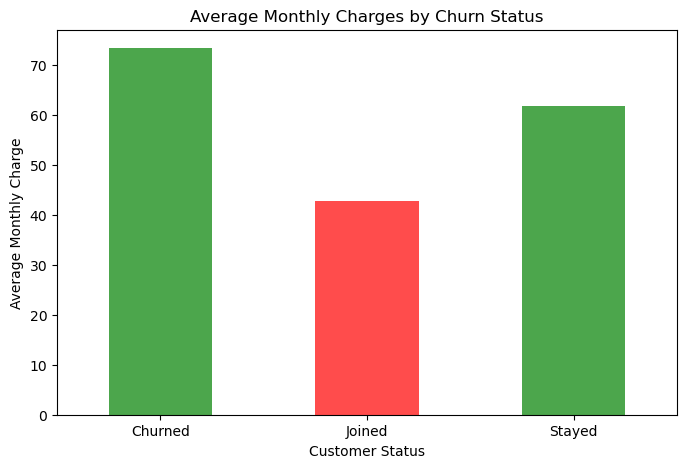

In [33]:
avg_monthly_charge = data.groupby('Customer Status')['Monthly Charge'].mean()

plt.figure(figsize=(8, 5))
avg_monthly_charge.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.ylabel('Average Monthly Charge')
plt.title('Average Monthly Charges by Churn Status')
plt.xticks(rotation=0)
plt.show()


<Figure size 1000x600 with 0 Axes>

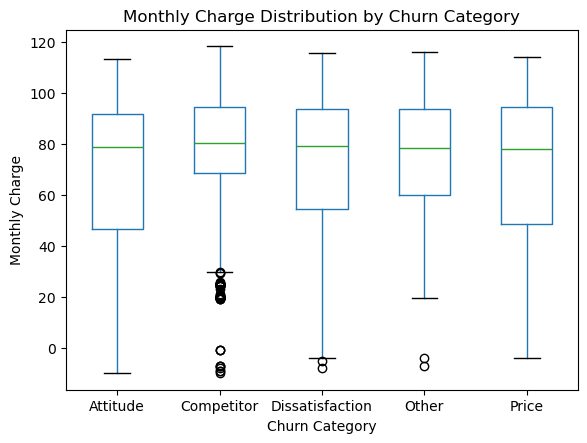

In [34]:
plt.figure(figsize=(10, 6))
data.boxplot(column='Monthly Charge', by='Churn Category', grid=False)
plt.xlabel('Churn Category')
plt.ylabel('Monthly Charge')
plt.title('Monthly Charge Distribution by Churn Category')
plt.suptitle('')  # To remove the automatic title
plt.show()


In [19]:
X = data.drop("Total Revenue", axis=1)
y = data["Total Revenue"]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(5634, 37)

In [21]:
y_train.shape


(5634,)

In [22]:
X_test.shape


(1409, 37)

In [23]:
y_test.shape

(1409,)

In [24]:
# Export the cleaned dataset to a CSV file
data.to_csv("Cleaned_Telecom_Customer_Churn.csv", index=False)